In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
df=pd.DataFrame(pd.read_csv('survey_results_public.csv'))
schema=pd.DataFrame(pd.read_csv('survey_results_schema.csv'))
public.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [96]:
schema.head()

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID296,Employment,Which of the following best describes your cur...,False,MC,MAVR


In [454]:
#No. of rows and cols
print("The no. of rows :",df.shape[0])
print("The no. of columns :",df.shape[1])

The no. of rows : 73268
The no. of columns : 79


In [100]:
df.isnull().sum()
print('The columns with no missing values:\n ', public.columns[public.isnull().mean()==0])

The columns with no missing values:
  Index(['ResponseId', 'MainBranch'], dtype='object')


In [101]:
df.isnull().sum()
print('The columns with missing values:\n ', public.columns[public.isnull().mean()!=0])

The columns with missing values:
  Index(['Employment', 'RemoteWork', 'CodingActivities', 'EdLevel', 'LearnCode',
       'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro',
       'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

In [102]:
print('The columns that have 75% missing values',df.columns[df.isnull().mean()>0.75])

The columns that have 75% missing values Index(['VCHostingPersonal use', 'VCHostingProfessional use'], dtype='object')


In [103]:
#print("There aflic.isnull().mean()==1.0]
df.columns[df.isnull().mean()==1.0]

Index(['VCHostingPersonal use', 'VCHostingProfessional use'], dtype='object')

In [64]:
print("Finding the categorical variables")
cat_df=df.select_dtypes(include=['object']).copy()
cat_col_lst=cat_df.columns
cat_col_lst

Finding the categorical variables


Index(['MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
       'Country', 'Currency', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith',
       'Blockchain', 'NEWSOSites', 'SOVisitFreq', 'SO

In [104]:
df.describe()

,ResponseId,CompTotal,VCHostingPersonal use,VCHostingProfessional use,WorkExp,ConvertedCompYearly
count,73268.000000,3.842200e+04,0.0,0.0,36769.000000,3.807100e+04
mean,36634.500000,2.342434e+52,NaN,NaN,10.242378,1.707613e+05
std,21150.794099,4.591478e+54,NaN,NaN,8.706850,7.814132e+05
min,1.000000,0.000000e+00,NaN,NaN,0.000000,1.000000e+00
25%,18317.750000,3.000000e+04,NaN,NaN,4.000000,3.583200e+04
50%,36634.500000,7.750000e+04,NaN,NaN,8.000000,6.784500e+04
75%,54951.250000,1.540000e+05,NaN,NaN,15.000000,1.200000e+05
max,73268.000000,9.000000e+56,NaN,NaN,50.000000,5.000000e+07


# Question 1: What is the percentage of work from home or remote work promoted by the companies country wise? Which country provides the highest remote work option?

In [106]:
df['RemoteWork']


2        Hybrid (some remote, some in-person)
3                                Fully remote
8        Hybrid (some remote, some in-person)
10       Hybrid (some remote, some in-person)
11                               Fully remote
                         ...                 
73259    Hybrid (some remote, some in-person)
73261    Hybrid (some remote, some in-person)
73263                            Fully remote
73264                          Full in-person
73266    Hybrid (some remote, some in-person)
Name: RemoteWork, Length: 38422, dtype: object

In [462]:
cc=df['RemoteWork'].value_counts()/df.shape[0]


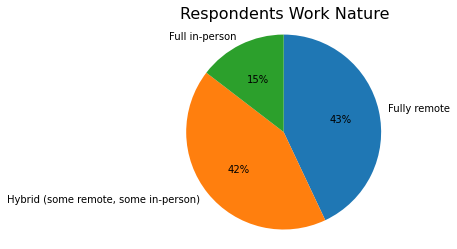

In [467]:
plt.title("Respondents Work Nature",fontsize=16)
plt.pie(cc,labels=cc.index,startangle=90,autopct="%.0f%%",counterclock=False)
plt.axis('square');

In [478]:
cc1=df['Country'].value_counts()/df.shape[0]
cc1[:10]

United States of America                                0.184842
India                                                   0.090613
Germany                                                 0.073634
United Kingdom of Great Britain and Northern Ireland    0.057187
Canada                                                  0.033985
France                                                  0.031774
Brazil                                                  0.028785
Poland                                                  0.023639
Netherlands                                             0.021223
Spain                                                   0.020759
Name: Country, dtype: float64

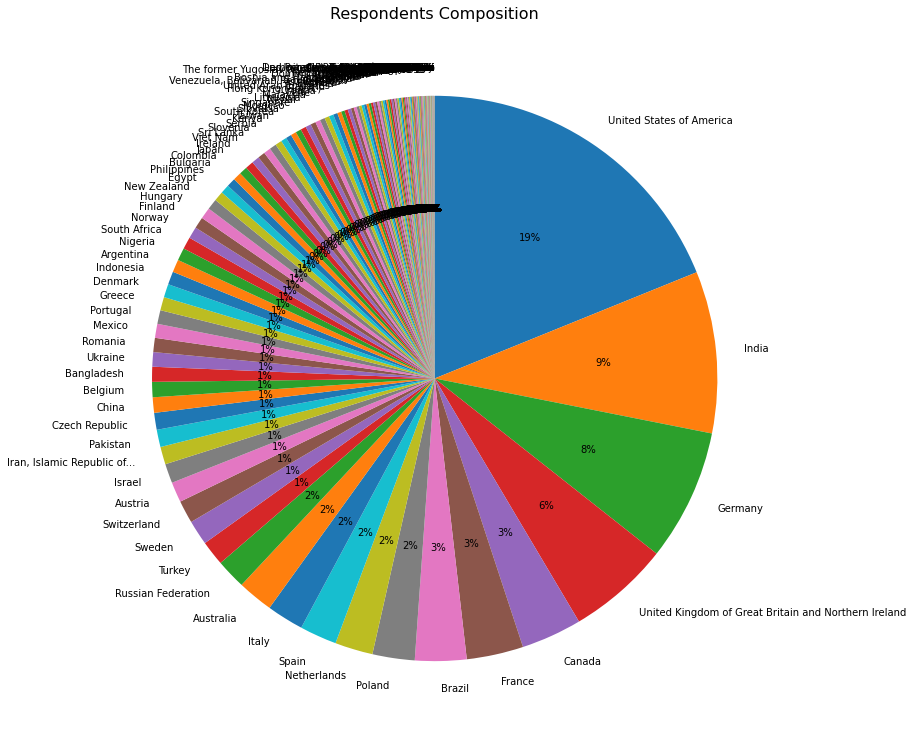

In [492]:
pi,ax=plt.subplots(figsize=[13,13])
plt.title("Respondents Composition",fontsize=16)
#pi,ax=plt.subplots(figsize=[10,10])
plt.pie(cc1,labels=cc1.index,startangle=90,autopct="%.0f%%",counterclock=False);
#plt.axis('square');

In [169]:
df['country_remotework']=df[df['RemoteWork']=='Fully remote'].Country
df['country_remotework'].value_counts()/df.shape[0]

United States of America                                0.303304
United Kingdom of Great Britain and Northern Ireland    0.066871
Germany                                                 0.059832
Canada                                                  0.056029
India                                                   0.053758
                                                          ...   
Mali                                                    0.000057
Kuwait                                                  0.000057
Fiji                                                    0.000057
Timor-Leste                                             0.000057
Oman                                                    0.000057
Name: country_remotework, Length: 146, dtype: float64

In [173]:
count=df['country_remotework'].value_counts()/df.shape[0]
#df['country_remotework'].value_counts()/df.shape[0]
count

United States of America                                0.303304
United Kingdom of Great Britain and Northern Ireland    0.066871
Germany                                                 0.059832
Canada                                                  0.056029
India                                                   0.053758
                                                          ...   
Mali                                                    0.000057
Kuwait                                                  0.000057
Fiji                                                    0.000057
Timor-Leste                                             0.000057
Oman                                                    0.000057
Name: country_remotework, Length: 146, dtype: float64

In [179]:
count1=count[:10]
#n=df.shape[0]
count1

United States of America                                0.303304
United Kingdom of Great Britain and Northern Ireland    0.066871
Germany                                                 0.059832
Canada                                                  0.056029
India                                                   0.053758
Brazil                                                  0.050579
Poland                                                  0.032016
Spain                                                   0.030767
France                                                  0.018676
Australia                                               0.017598
Name: country_remotework, dtype: float64

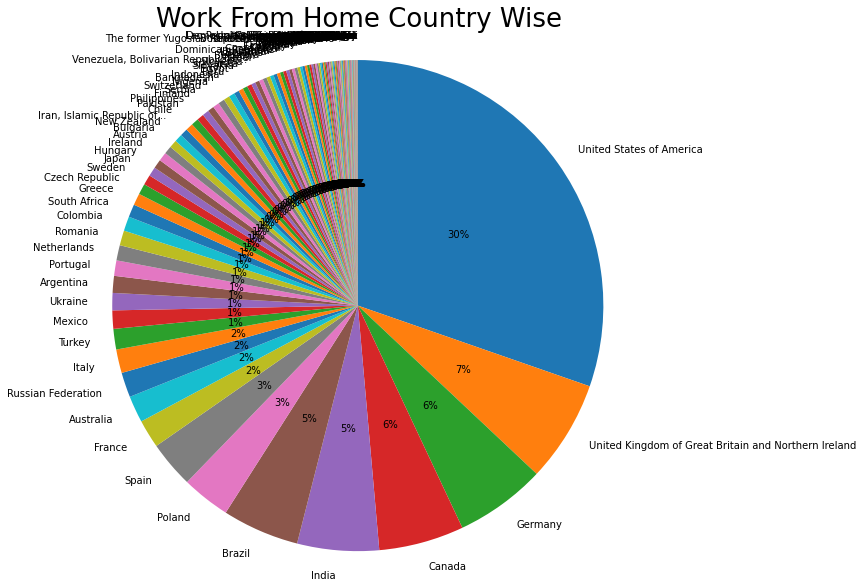

In [192]:

pi,ax=plt.subplots(figsize=[10,10])
plt.title("Work From Home Country Wise",fontsize=26) 
plt.pie(count,labels=count.index,startangle=90,counterclock=False,autopct="%.0f%%",pctdistance=0.5 );
plt.axis('square');

# The top 10 countries that promote work from home or remote work are United states of America with 30% followed by UK at 7%, Germany and Canada at 6% , India and Brazil at 5%,poland and spain at 3% and France and Australia at 2%  

# Question 2: What is the popular language preferred to work?

In [282]:
df=pd.DataFrame(pd.read_csv('survey_results_public.csv'))

In [494]:
df['DevType'].value_counts()/df.shape[0]

Developer, full-stack                                                                                                                                                                                                                                                                                                                                                                                                                  0.097478
Developer, back-end                                                                                                                                                                                                                                                                                                                                                                                                                    0.072351
Developer, front-end                                                                                                                    

In [283]:
df3=df[df['DevType']=='Developer, full-stack']
count1=df3.LanguageWantToWorkWith.value_counts()
ct1=count1[:10]

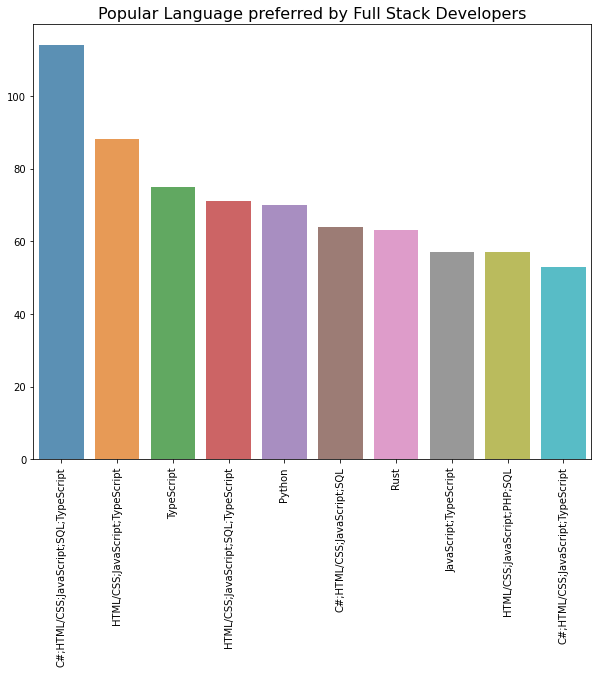

In [455]:
plt.figure(figsize=(10,8))
plt.title("Popular Language preferred by Full Stack Developers",fontsize=16)
sb.barplot(x=ct1.index,y=ct1.values,alpha=0.8)
plt.xticks(rotation=90)
plt.show()

In [285]:
df4=df[df['DevType']=='Developer, back-end']
count2=df4.LanguageWantToWorkWith.value_counts()
ct2=count2[:10]

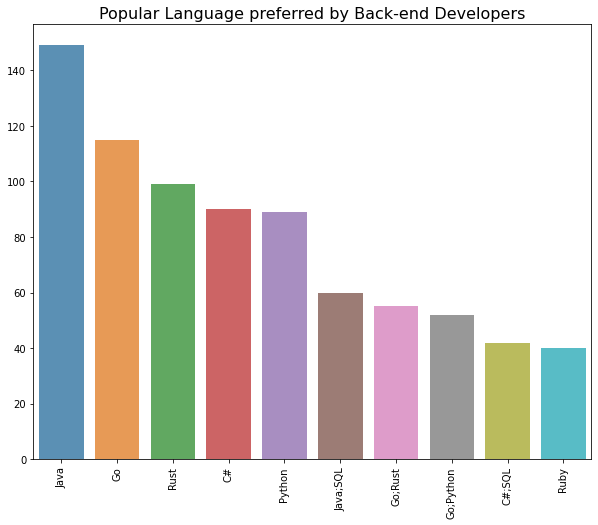

In [456]:
plt.figure(figsize=(10,8))
plt.title("Popular Language preferred by Back-end Developers",fontsize=16)
sb.barplot(x=ct2.index,y=ct2.values,alpha=0.8)
plt.xticks(rotation=90);

## The popular Languages to work with specified by the full stack developers are HTML/CSS/Javascript/TypeScript with C# and SQL. The top 5 popular languages preferred by backend developers are Java, GO, Rust, C# and Python.

## Question 3: What is the Education Level of the respondents who spends most time in searching for answers or solutions to problems encountered at work? 

In [436]:
df=pd.DataFrame(pd.read_csv('survey_results_public.csv'))

In [437]:
df.TimeSearching.value_counts()

30-60 minutes a day           13652
15-30 minutes a day           10122
60-120 minutes a day           6371
Less than 15 minutes a day     3528
Over 120 minutes a day         2525
Name: TimeSearching, dtype: int64

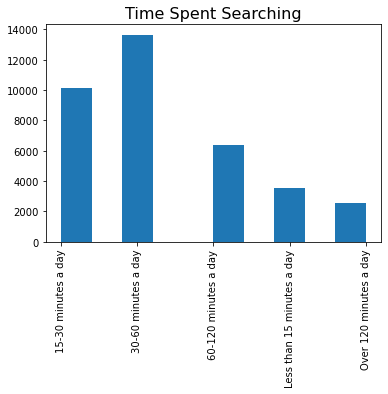

In [495]:
plt.title('Time Spent Searching',fontsize=16)
df5=df.dropna(subset=['TimeSearching'],axis=0)
plt.hist(data=df5,x='TimeSearching')
plt.xticks(rotation=90);


In [439]:
df5[df5['TimeSearching']=='Over 120 minutes a day'].RemoteWork.value_counts()

Fully remote                            1064
Hybrid (some remote, some in-person)     982
Full in-person                           473
Name: RemoteWork, dtype: int64

In [440]:
df5[df5['TimeSearching']=='Over 120 minutes a day'].EdLevel.value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          1226
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                        612
Some college/university study without earning a degree                                 301
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     134
Associate degree (A.A., A.S., etc.)                                                     95
Other doctoral degree (Ph.D., Ed.D., etc.)                                              65
Professional degree (JD, MD, etc.)                                                      38
Something else                                                                          26
Primary/elementary school                                                               25
Name: EdLevel, dtype: int64

In [441]:
df5[df5['TimeSearching']=='30-60 minutes a day'].EdLevel.value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          6749
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       3382
Some college/university study without earning a degree                                1599
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     634
Associate degree (A.A., A.S., etc.)                                                    434
Other doctoral degree (Ph.D., Ed.D., etc.)                                             430
Professional degree (JD, MD, etc.)                                                     213
Something else                                                                         135
Primary/elementary school                                                               73
Name: EdLevel, dtype: int64

In [445]:
df_ed_ord=df.groupby(['EdLevel','TimeSearching']).size().unstack()
df_ed_ord

TimeSearching,15-30 minutes a day,30-60 minutes a day,60-120 minutes a day,Less than 15 minutes a day,Over 120 minutes a day
EdLevel,,,,,
"Associate degree (A.A., A.S., etc.)",320,434,202,112,95
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4864,6749,3115,1677,1226
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",2659,3382,1637,890,612
"Other doctoral degree (Ph.D., Ed.D., etc.)",322,430,150,129,65
Primary/elementary school,58,73,35,36,25
"Professional degree (JD, MD, etc.)",170,213,108,59,38
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",464,634,304,163,134
Some college/university study without earning a degree,1159,1599,749,425,301
Something else,98,135,70,35,26


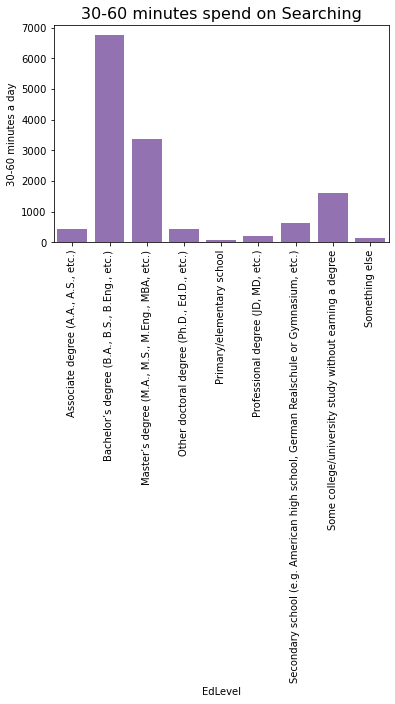

In [457]:
plt.title("30-60 minutes spend on Searching",fontsize=16)
sb.barplot(data=df_ed_ord,x=df_ed_ord.index,y='30-60 minutes a day',color=sb.color_palette()[4])
plt.xticks(rotation=90);

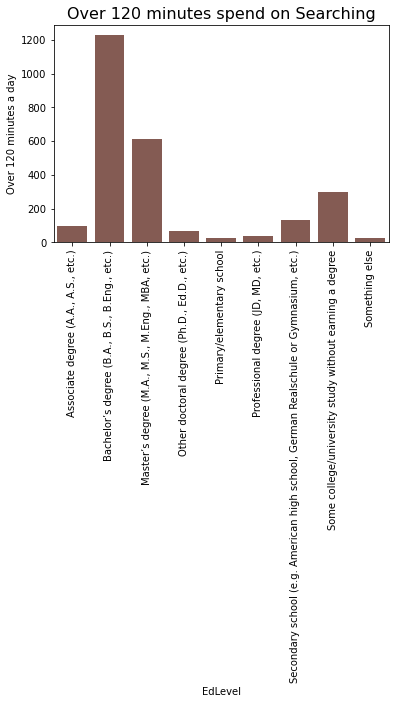

In [496]:
plt.title("Over 120 minutes spend on Searching",fontsize=16)
sb.barplot(data=df_ed_ord,x=df_ed_ord.index,y='Over 120 minutes a day',color=sb.color_palette()[5])
plt.xticks(rotation=90);

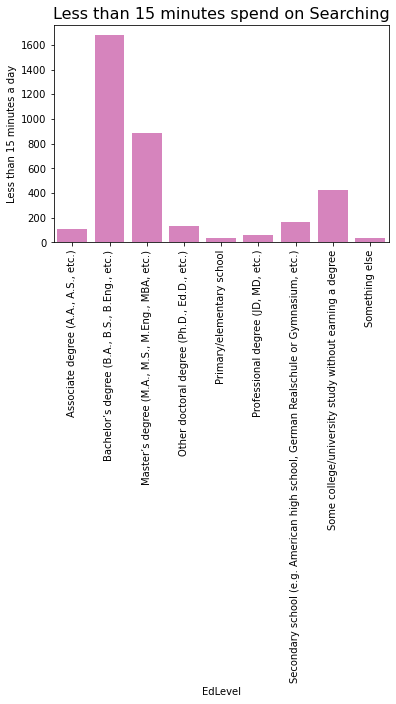

In [458]:
plt.title("Less than 15 minutes spend on Searching",fontsize=16)
sb.barplot(data=df_ed_ord,x=df_ed_ord.index,y='Less than 15 minutes a day',color=sb.color_palette()[6])
plt.xticks(rotation=90);

## The Time Searching for answers or solutions to problems encountered at work was spent the most by the survey respondents with a bachelor's degree followed by repondents with a master's degree.